%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
First few elements of X_train:
 [[1 1 1]
 [1 0 1]
 [1 0 0]
 [1 0 0]
 [1 1 1]]
Type of X_train: <class 'numpy.ndarray'>
First few elements of y_train: [1 1 0 0 1]
Type of y_train: <class 'numpy.ndarray'>
The shape of X_train is: (10, 3)
The shape of y_train is:  (10,)
Number of training examples (m): 10
Entropy at root node:  1.0
Left indices:  [0, 1, 2, 3, 4, 7, 9]
Right indices:  [5, 6, 8]
Information Gain from splitting the root on brown cap:  0.034851554559677034
Information Gain from splitting the root on tapering stalk shape:  0.12451124978365313
Information Gain from splitting the root on solitary:  0.2780719051126377
Best feature to split on: 2
 Depth 0, Root: Split on feature: 2
- Depth 1, Left: Split on feature: 2
  -- Left leaf node with indices [0, 1, 4, 5, 7]
  -- Right leaf node with indices []
- Depth 1, Right: Split on feature: 2


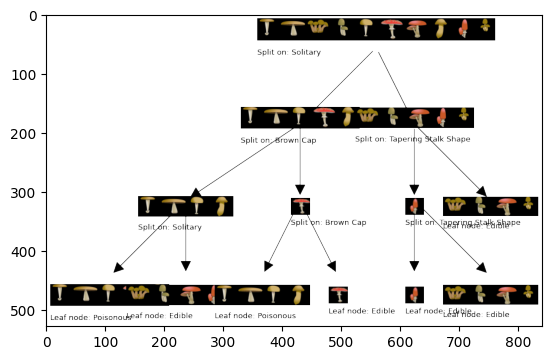

In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv

%matplotlib inline


X_train = np.array([[1,1,1],[1,0,1],[1,0,0],[1,0,0],[1,1,1],[0,1,1],[0,0,0],[1,0,1],[0,1,0],[1,0,0]])
y_train = np.array([1,1,0,0,1,0,0,1,1,0])

print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))

print("First few elements of y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(X_train))


def compute_entropy(y):
    """
    Computes the entropy for 
    
    Args:
       y (ndarray): Numpy array indicating whether each example at a node is
           edible (1) or poisonous (0)
       
    Returns:
        entropy (float): Entropy at that node
        
    """
    
    entropy = 0
    
    if len(y) != 0:
        p1 = len(y[y == 1]) / len(y)
        
        if p1 != 0 and p1 != 1:
            entropy = -p1 * np.log2(p1) - (1 - p1) * np.log2(1 - p1)
        else:
            entropy = 0.        
    
    return entropy

print("Entropy at root node: ", compute_entropy(y_train)) 


def split_dataset(X, node_indices, feature):
    """
    Splits the data at the given node into
    left and right branches
    
    Args:
        X (ndarray):             Data matrix of shape(n_samples, n_features)
        node_indices (list):     List containing the active indices. I.e, the samples being considered at this step.
        feature (int):           Index of feature to split on
    
    Returns:
        left_indices (list):     Indices with feature value == 1
        right_indices (list):    Indices with feature value == 0
    """

    left_indices = []
    right_indices = []

    for i in node_indices:
        if X[i][feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)

    return left_indices, right_indices


root_indices = [0,1,2,3,4,5,6,7,8,9]
# The dataset only has three features, so this value can be 0 (Brown Cap), 1 (Tapering Stalk Shape) or 2 (Solitary)
feature = 0

left_indices, right_indices = split_dataset(X_train, root_indices, feature)

print("Left indices: ", left_indices)
print("Right indices: ", right_indices)


def compute_information_gain(X, y, node_indices, feature):
    
    """
    Compute the information of splitting the node on a given feature
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
   
    Returns:
        cost (float):        Cost computed
    
    """    
    # Split dataset
    left_indices, right_indices = split_dataset(X, node_indices, feature)
    
    # Some useful variables
    X_node, y_node = X[node_indices], y[node_indices]
    X_left, y_left = X[left_indices], y[left_indices]
    X_right, y_right = X[right_indices], y[right_indices]
    
    # You need to return the following variables correctly
    information_gain = 0

    #compute the entropy at the node using compute_entropy()
    node_entropy = compute_entropy(y_node)
    #compute the entropy at the left branch
    left_entropy = compute_entropy(y_left)
    #compute the entropy at the right branch
    right_entropy = compute_entropy(y_right)

    #calculate the proportion of examples at the left branch
    w_left = len(X_left) / len(X_node)
    #calculate the proportion of examples at the right branch
    w_right = len(X_right) / len(X_node)

    #calculate the weighted entropy from the split using
    weighted_entropy = w_left * left_entropy + w_right * right_entropy

    #calculate the information gain as the entropy at the node minus the weighted entropy
    information_gain = node_entropy - weighted_entropy

    return information_gain


info_gain0 = compute_information_gain(X_train, y_train, root_indices, feature=0)
info_gain1 = compute_information_gain(X_train, y_train, root_indices, feature=1)
info_gain2 = compute_information_gain(X_train, y_train, root_indices, feature=2)

print("Information Gain from splitting the root on brown cap: ", info_gain0)
print("Information Gain from splitting the root on tapering stalk shape: ", info_gain1)
print("Information Gain from splitting the root on solitary: ", info_gain2)
#Splitting on "Solitary" (feature = 2) at the root node gives the maximum information gain. Therefore, it's the best feature to split on at the root node.


def get_best_split(X, y, node_indices):   
    """
    Returns the optimal feature and threshold value
    to split the node data 
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.

    Returns:
        best_feature (int):     The index of the best feature to split
    """    
    
    num_features = X.shape[1]

    best_feature = -1

    max_info_gain = 0

    for feature in range(num_features):
        info_gain = compute_information_gain(X, y, root_indices, feature)
        if info_gain > max_info_gain:
            max_info_gain = info_gain
            best_feature = feature

    return best_feature


best_feature = get_best_split(X_train, y_train, root_indices)
print('Best feature to split on: %d' % best_feature)
#As we saw above, the function returns that the best feature to split on at the root node is feature 2 ("Solitary")


tree = []

def build_tree_recursive(X, y, node_indices, branch_name, max_depth, current_depth):
    """
    Build a tree using the recursive algorithm that split the dataset into 2 subgroups at each node.
    This function just prints the tree.
    
    Args:
        X (ndarray):            Data matrix of shape(n_samples, n_features)
        y (array like):         list or ndarray with n_samples containing the target variable
        node_indices (ndarray): List containing the active indices. I.e, the samples being considered in this step.
        branch_name (string):   Name of the branch. ['Root', 'Left', 'Right']
        max_depth (int):        Max depth of the resulting tree. 
        current_depth (int):    Current depth. Parameter used during recursive call.
   
    """ 

    # Maximum depth reached - stop splitting
    if current_depth == max_depth:
        formatting = " "*current_depth + "-"*current_depth
        print(formatting, "%s leaf node with indices" % branch_name, node_indices)
        return
   
    # Otherwise, get best split and split the data
    # Get the best feature and threshold at this node
    best_feature = get_best_split(X, y, node_indices) 
    
    formatting = "-"*current_depth
    print("%s Depth %d, %s: Split on feature: %d" % (formatting, current_depth, branch_name, best_feature))
    
    # Split the dataset at the best feature
    left_indices, right_indices = split_dataset(X, node_indices, best_feature)
    tree.append((left_indices, right_indices, best_feature))
    
    # continue splitting the left and the right child. Increment current depth
    build_tree_recursive(X, y, left_indices, "Left", max_depth, current_depth+1)
    build_tree_recursive(X, y, right_indices, "Right", max_depth, current_depth+1)

build_tree_recursive(X_train, y_train, root_indices, "Root", max_depth=2, current_depth=0)
print('y = 0(edible): [2, 3, 5, 6, 8, 9]')
print('y = 1(poisonous): [0, 1, 4, 7] ')

img = mpimg.imread(r"C:\Users\brazi\OneDrive\Área de Trabalho\Projects\cogu.png")
imgplot = plt.imshow(img)
